# DASK Development

In [1]:
from dask.distributed import Client


client = Client("tcp://127.0.0.1:34323")
client

Client Scheduler: tcp://127.0.0.1:34323 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 4 Memory: 25.77 GB


#### Functions

In [2]:
from time import sleep
from dask import delayed

def inc(x):
    sleep(1)
    return x+1

def add(x,y):
    sleep(1)
    return x+y

In [3]:
%%time 
#sequential
x = inc(1)
y = inc(2)
z = add(x,y)

CPU times: user 6.13 ms, sys: 49 µs, total: 6.18 ms
Wall time: 3 s


In [4]:
%%time
#parallel setup
x = delayed(inc)(1)
y = delayed(inc)(2)
z = delayed(add)(x,y)

CPU times: user 1.33 ms, sys: 789 µs, total: 2.12 ms
Wall time: 1.6 ms


In [5]:
%%time
#parallel load
z.compute()

CPU times: user 13.2 ms, sys: 2.27 ms, total: 15.4 ms
Wall time: 2.04 s


5

In [6]:
z

Delayed('add-0af98b54-ef73-4042-8fcf-82654d36cf9f')

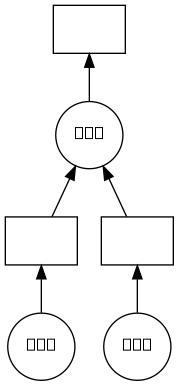

In [7]:
z.visualize()

#### Parallelize a for loop

In [8]:
data = [1,2,3,4,5,6,7,8]

In [9]:
%%time
#sequential
results = []
for x in data:
    y = inc(x)
    results.append(y)
    
total = sum(results)

CPU times: user 17.7 ms, sys: 5.19 ms, total: 22.9 ms
Wall time: 8.01 s


In [10]:
total

44

In [11]:
%%time
#parallel
results = []
for x in data:
    y = delayed(inc)(x)
    results.append(y)

total = delayed(sum)(results)
print("Before comupting:", total)
result = total.compute()
print("After computing:", result)

Before comupting: Delayed('sum-8f9f0d64-f036-47d7-8d70-154ab2b29998')
After computing: 44
CPU times: user 18.7 ms, sys: 1.43 ms, total: 20.2 ms
Wall time: 2.04 s


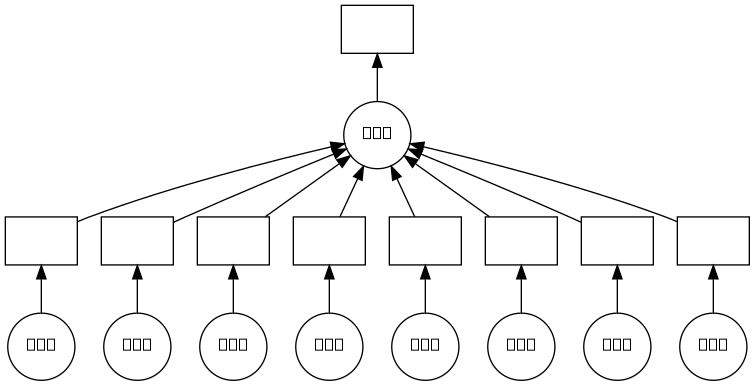

In [12]:
total.visualize()

#### Parallelizing a for-loop: Control Flow

In [13]:
def double(x):
    sleep(1)
    return 2*x

def is_even(x):
    return not x%2

data = [1,2,3,4,5,6,7,8,9,10]

In [14]:
%%time
#sequential code
results = []
for x in data:
    if is_even(x):
        y = double(x)
    else:
        y = inc(x)
    results.append(y)
    
total = sum(results)
print(total)

90
CPU times: user 22.7 ms, sys: 8.39 ms, total: 31.1 ms
Wall time: 10 s


In [15]:
%%time
#parallel code setup
for x in data:
    if is_even(x):
        y = delayed(double)(x)
    else:
        y = delayed(inc)(x)
    results.append(y)
total = delayed(sum)(results)

CPU times: user 1.64 ms, sys: 1.91 ms, total: 3.54 ms
Wall time: 2.55 ms


In [16]:
%time total.compute()
#parallel execution

CPU times: user 13.9 ms, sys: 3.3 ms, total: 17.2 ms
Wall time: 3.04 s


180

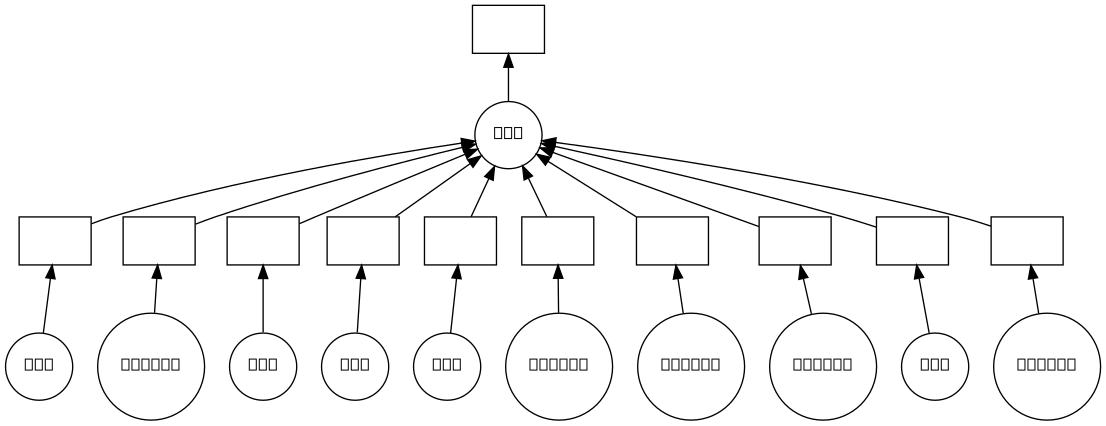

In [17]:
total.visualize()

#### Parallelizing a Pandas Groupby Reduction

In [18]:
from dask import compute
import numpy as np
import pandas as pd
x = delayed(np.arange)(10)
y = x**2
min_, max_ = compute(y.min(), y.max())
min_, max_

(0, 81)